(neural_net)=
# Einzelnes Neuron

Dieses Kapitel beschreibt die Funktionsweise eines einzelnen Neurons, das kleinste Element neuronaler Netze. Mit Bildern, Text und Codes wird die Funktionsweise der Neuronen erarbeitet.


In der Abbildung [Modell eines Neurons](neuron1) ist der Aufbau eines Neurons dargestellt. Ein einzelnes Neuron besitzt mehrere, gewichtete Eingänge und einen Ausgang.

Die gewichteten Eingabewerte werden mit einem Bias verrechnet, vom Neuron aufsummiert und durch eine Aktivierungsfunktion wird ein Ausgabewert berechnet.

```{note}
Weitere Informationen:
[Neuronale Netze: Ein Blick in die Blackbox](https://www.informatik-aktuell.de/betrieb/kuenstliche-intelligenz/neuronale-netze-ein-blick-in-die-black-box.html).
```

:::{figure-md} neuron1
<img src="images/neuron.png" alt="pozi" class="bg-primary mb-1" width="600px">

Modell eines einzelnen Neurons.
:::

## Ein vereinfachtes Neuron

In der Abbildung [Neuron ohne Bias und Aktivierungsfunktion](neuron_no_bias) ist ein vereinfachtes künstliches Neuron zu sehen. Dieses Neuron besitzt keine Aktivierungsfunktion und keinen Bias-Term. Es besitzt lediglich eine Summenfunktion und summiert die gewichteten Eingabewerte.

:::{figure-md} neuron_no_bias
<img src="images/neuron_summe.png" alt="pozi" class="bg-primary mb-1" width="600px">

Neuron ohne Bias und Aktivierungsfunktion.
:::

Die **Eingabedaten X** werden nun mit den **Gewichten w** verrechnet. Das Neuron bildet anschließend die Summe und gibt diese als **Ausgabewert y** aus. Wie die Werte für die Gewichte bestimmt werden, wird im Kapitel [Lernvorgang](nn_learning) erläutert. Für das weitere Vorgehen, reicht es aus zu wissen, dass es diese Gewichte gibt.

Dies sind die Grundlagen zum Verständnis des konzeptionellen Aufbaus neuronaler Netze. Was dieses Neuron kann, wird anhand eines Beispiels in Python gezeigt.

## Lineare Regression ohne Bias

In dem folgenden Beispiel, geht es darum anhand der linearen Regression die Funktionsweise eines Neurons zu demonstrieren. Solange das Neuron noch keine Aktivierungsfunktion besitzt, arbeitet es wie die lineare Regression.

[Linear Regression and Bias](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2)

**Beispiel: Millimeter in Zoll umrechnen**

In [16]:
X = [
    [1],
    [15],
    [60]
]

y = [
    0.0393701,
    0.590551,
    2.3622
]

from sklearn import linear_model

# Da ohne Bias: fit_intercept = False 
model = linear_model.LinearRegression(fit_intercept = False)

# Modell mit den Daten trainieren
model.fit(X, y)

# das Gewicht (Steigung / Koeffizient)
print("Das (gelernte) Gewicht ="+ str(model.coef_))

Millimeter = 25.4
print(str(Millimeter)+"mm * Gewicht = "+ str(Millimeter * model.coef_)+"Zoll")

Das (gelernte) Gewicht =[0.03937]
25.4mm * Gewicht = [0.9999981]Zoll


Die Länge von 25,4 mm entspricht der Länge von 1 Zoll. Das Modell hat den Zusammenhang der Trainingsdaten gelernt. Das gelernte Gewicht entspricht dabei der Steigung der Regressionsgeraden.

Dieser gelernte Zusammenhang kann nun auch auf neue Daten angewendet werden. Eine „Vorhersage“ für eine Reihe von Werten bekommt man mit der *predict-Methode*:

In [18]:
# mehrere Werte vorhersagen lassen
model.predict([
    [254],
    [130]
])

array([9.999981  , 5.11810051])

Das einzelne Neuron ist bereits in der Lage den Zusammenhang zwischen Millimeter und Zoll aus Trainingsdaten zu lernen. Da Millimeter und Zoll, beide im Ursprung bei null beginnen, war das Neuron auch ohne Bias-Term in der Lage, den Zusammenhang korrekt zu lernen.

## Lineare Regression mit Bias

Um den Zusammenhang zwischen Grad Celsius und Fahrenheit zu lernen, d.$~$h. eine optimale Regressionsgerade berechnen zu können, ist bei diesem Beispiel die Verwendung des Bias-Term notwendig [Modell eines einzelnen Neurons mit Bias](neuron_bias). Der Bias-Term gibt dem Neuron einen zusätzlichen Freiheitsgrad, der es ermöglicht, nicht nur die Steigung zu variieren, sondern auch die Ausgleichsgerade in Y-Richtung zu verschieben (siehe [folgende Abbildung](residual_bias))

:::{figure-md} residuals_bias
<img src="images/residuals.png" alt="residuals" class="bg-primary mb-1" width="600px">

Regressionsgerade durch Bias-Term verschiebbar in Y-Richtung.
:::

**Beispiel: Grad Celsius in Fahrenheit umrechnen**

:::{figure-md} neuron_bias
<img src="images/neuron_bias.png" alt="pozi" class="bg-primary mb-1" width="600px">

Modell eines einzelnen Neurons mit Bias.
:::

In [6]:
X = [
    [-10],
    [0],
    [20]
]

y = [
    14,
    32,
    68
]

from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = True)
model.fit(X, y)

print(model.coef_)
print(model.intercept_)

Das Neuron hat den Zusammenhang korrekt gelernt. 

Die Berechnungsformel lautet:
**°F = °C * 1,8 + 32 (von Celsius nach Fahrenheit)**

```{note}
Setze ungenaue Trainigswerte ein und schau wie sich das Ergebnis verändert.
```

## Aktivierungsfunktion

**Wozu ist die Aktivierungsfunktion nötig?**

Um aus vielen Neuronen ein neuronales Netz zu erzeugen, ist es notwendig, diese hintereinander zu schalten. Die vereinfachten, linearen Neuronen lassen sich aber nicht hintereinander schalten bzw. verknüpfen, da es  keinen Sinn ergibt dies zu tun. Eine Beispielrechnung [Lineare Neuronen in Reihe geschaltet](activation_series) verdeutlicht das. 

**Beispiel:**  
Am Eingang X liegt eine 5 an und am Ausgang soll eine 20 ausgegeben werden. Die beiden Gewichte bekommen 2 als Faktor. Das gleiche Ergebnis würde herauskommen, wenn man ein Neuron mit einem Gewicht und dem Faktor 4 verwendet.

:::{figure-md} activation_series
<img src="images/neuron_series.png" alt="sig" class="bg-primary mb-1" width="600px">

Lineare Neuronen in Reihe geschaltet.


Des Weiteren ist es mit einem linearen Neuron ohne Aktivierungsfunktion bisher nicht möglich eine Ja/Nein Antwort oder Ausgabewerte zwischen 0 und 1 zu erhalten. Um dies zu erreichen, wird eine Aktivierungsfunktion benötigt.  

(sigmoid)=
## Sigmoid als Aktivierungsfunktion

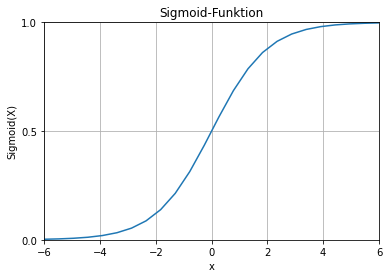

In [4]:
# Import matplotlib, numpy and math
import matplotlib.pyplot as plt
import numpy as np
import math
  
x = np.linspace(-6, 6, 24)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid(True)
plt.xlim([-6, 6])
plt.ylim([0, 1])
plt.yticks(np.arange(0, 1.1, 0.5))
plt.title('Sigmoid-Funktion')

plt.show()

Die Eingabewerte von -6 bis 6 werden auf einen Zahlenbereich zwischen 0 und 1 umgerechnet.

(logistic_reg)=
## Logistische Regression

Das Neuron besitzt nun eine (Sigmoid-) Aktivierungsfunktion [Neuron mit Aktivierungsfunktion](neuron_activation). Es arbeitet jetzt wie die logistische Regression und kommt der Funktionsweise eines KNN schon sehr nah.

:::{figure-md} neuron_activation
<img src="images/neuron_activation.png" alt="pozi" class="bg-primary mb-1" width="600px">

Modell eines einzelnen Neurons Aktivierungsfunktion.
:::

Neuronale Netze werden oft für Fragestellungen eingesetzt, bei der eine Ja/Nein Antwort benötigt wird. In der Medizin: Brustkrebs Ja oder Nein? 

**Beispiel: Wird ein Studierender die Prüfung bestehen?**

In diesem einfachen Beispiel wurden Daten von Studierenden aufgenommen. Die X-Werte sind die Anzahl an Stunden, die zur Vorbereitung auf eine Prüfung aufgewendet wurden. Die y-Werte stellen die Labels dar und geben an, ob bei der jeweiligen Stundenzahl die Prüfung bestanden wurde oder nicht.

In [36]:
# X = Wie viele Stunden wurde gelernt?

X = [
    [50],
    [60],
    [70],
    [20],
    [10],
    [30],
]

# wurde die Prüfung bestanden?: 1 = ja ; 0= nein

y = [
    1, 
    1,
    1,
    0, 
    0, 
    0,
]

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 100000)

# Modell trainieren
model.fit(X, y)

# Vorhersage Wahrscheinlichkeit des bestehens der Prüfung bei gegebener Lernstundenanzahl:
proba = model.predict_proba([
    [40]
])
print(proba[0][0]) # wird bestehen [%]
print(proba[0][1]) # wird nicht bestehen [%]

0.5182602366346037
0.48173976336539626


```{note}
Dieser Code ist ausführbar. Klicke das Raketen Symbol in der oberen Leiste und wähle Colab aus.
```

Die Funktionsweise eines Neurons wurde nun erläutert. Im  [nächsten Kapitel](nn_learning) geht es darum, wie aus solchen Neuronen ein neuronales Netz erstellt werden kann.